In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

5


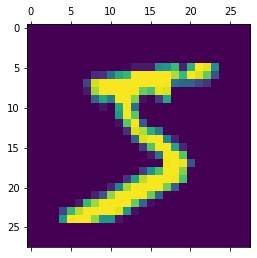

In [4]:
plt.matshow(X_train[0])
print(y_train[0])

In [5]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
#scaling will help the model

In [7]:
X_train= X_train/255
X_test = X_test/255

In [8]:
#We'll need to flatten the 28x28 grid

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_test_flattened.shape,X_train_flattened.shape)

(10000, 784) (60000, 784)


In [10]:
# Creating a simple neural network 

In [11]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #output,inputneuron no.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',#because int value
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10,verbose=2)

Epoch 1/10
1875/1875 - 1s - loss: 0.4672 - accuracy: 0.8775
Epoch 2/10
1875/1875 - 1s - loss: 0.3038 - accuracy: 0.9155
Epoch 3/10
1875/1875 - 1s - loss: 0.2833 - accuracy: 0.9211
Epoch 4/10
1875/1875 - 1s - loss: 0.2733 - accuracy: 0.9238
Epoch 5/10
1875/1875 - 1s - loss: 0.2666 - accuracy: 0.9264
Epoch 6/10
1875/1875 - 1s - loss: 0.2618 - accuracy: 0.9275
Epoch 7/10
1875/1875 - 1s - loss: 0.2583 - accuracy: 0.9288
Epoch 8/10
1875/1875 - 1s - loss: 0.2556 - accuracy: 0.9295
Epoch 9/10
1875/1875 - 1s - loss: 0.2530 - accuracy: 0.9304
Epoch 10/10
1875/1875 - 1s - loss: 0.2510 - accuracy: 0.9310


In [12]:
y_preds= model.predict(X_test_flattened)
y_preds[100]

array([2.2838712e-03, 2.2916466e-02, 5.3611028e-01, 1.9660145e-02,
       3.2827854e-03, 4.0122867e-04, 9.7802854e-01, 1.6453862e-04,
       2.0889044e-03, 6.3217944e-05], dtype=float32)

6

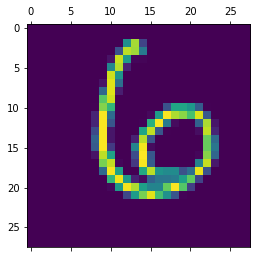

In [13]:
plt.matshow(X_test[100])
np.argmax(y_preds[100]) #prints index of max value

In [14]:
#convering y_pred values to int values using loop 
y_preds_labels= [np.argmax(i) for i in y_preds]
y_preds_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [15]:
y_preds_labels= [np.argmax(i) for i in y_preds]

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_preds_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    7,    2,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   5,   11,  920,   18,    7,    4,   14,    9,   39,    5],
       [   3,    0,   15,  933,    0,   19,    3,    9,   19,    9],
       [   1,    1,    3,    2,  905,    0,   11,    4,    8,   47],
       [  10,    2,    1,   40,    9,  768,   18,    6,   31,    7],
       [  12,    3,    6,    1,    7,    7,  920,    1,    1,    0],
       [   1,    6,   24,    8,    7,    1,    0,  938,    1,   42],
       [   7,   12,    6,   25,    8,   25,   12,    8,  859,   12],
       [  11,    7,    1,   10,   17,    5,    0,   12,    5,  941]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

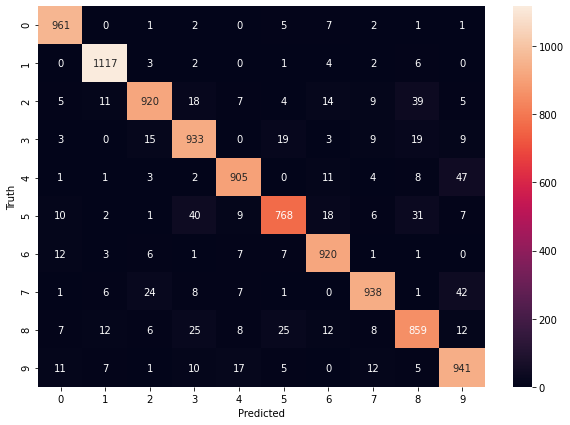

In [16]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
#Adding Hidden layers and Tensorboard

In [31]:
model2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#Flatten function from keras 
    keras.layers.Dense(100,activation='relu'), # 100 in the hidden layer number
    keras.layers.Dense(10,activation='sigmoid')
])

#tb_callback= tf.keras.callbacks.TensorBoard(log_dir="logs/SGD",histogram_freq=1)
tb_callback= tf.keras.callbacks.TensorBoard(log_dir="logs/adam",histogram_freq=1)

model2.compile(
    #optimizer='SGD',
    optimizer='adam',
    loss='sparse_categorical_crossentropy',#because int value
    metrics=['accuracy']
)

model2.fit(X_train, y_train, epochs=5,verbose=2,callbacks=[tb_callback])

# on terminal type $ tensorboard --logdir logs/ 

Epoch 1/5
1875/1875 - 2s - loss: 0.6365 - accuracy: 0.8431
Epoch 2/5
1875/1875 - 2s - loss: 0.3397 - accuracy: 0.9061
Epoch 3/5
1875/1875 - 1s - loss: 0.2907 - accuracy: 0.9185
Epoch 4/5
1875/1875 - 1s - loss: 0.2597 - accuracy: 0.9281
Epoch 5/5
1875/1875 - 2s - loss: 0.2371 - accuracy: 0.9341


In [28]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 0s 837us/step - loss: 0.0862 - accuracy: 0.9729


[0.0862075462937355, 0.9728999733924866]

Text(69.0, 0.5, 'Truth')

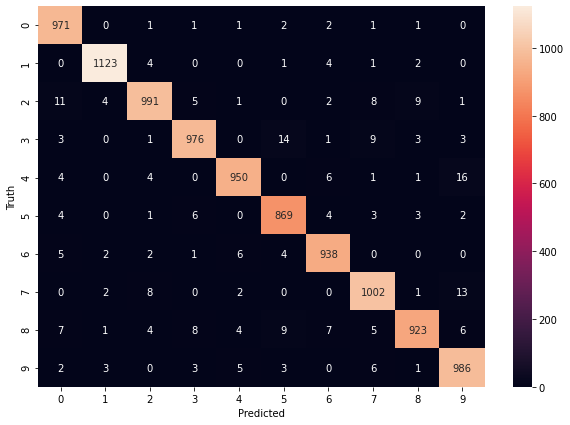

In [29]:
y_preds= model2.predict(X_test)
y_preds_labels= [np.argmax(i) for i in y_preds]

cm_2=tf.math.confusion_matrix(labels=y_test,predictions=y_preds_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm_2,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')